<a href="https://colab.research.google.com/github/120Davies/MMG/blob/master/MMG_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# OBJECTIVES
# 1) Establish clean sets of data:
#   a) Total raw data, with correct data types
#   b) Various data sets showing important correlations
# 2) Produce clean, concise graphs which illustrate interesting correlations on these data
# 3) Assemble graphs in a blog post in a consumable format.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy

In [0]:
reddit_url = 'https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(reddit)%20(Responses)%20-%20Form%20Responses%201.csv'
facebook_url = 'https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(Responses)%20-%20Form%20Responses%201.csv'
slack_url = 'https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(Slack)%20(Responses)%20-%20Form%20Responses%201.csv'

In [56]:
df_reddit_raw = pd.read_csv(reddit_url)
df_reddit_raw.head()

,Timestamp,How much money do you ask for (in USD)?,How many years old are you?,What is your gender?,About how much do you make per year?,"On a scale of 1 to 10, how greedy would you say you are?",Do you own a home?,Name a color.,Source
0,6/18/2019 19:51:45,1000,25.00,Male,6000,3.00,No,Black,reddit
1,6/18/2019 20:02:40,50,13.00,Male,0,4.00,No,Green,reddit
2,6/18/2019 20:12:08,50000000,19.00,Female,NaN,5.00,No,blue,reddit
3,6/18/2019 20:15:09,5000,15.00,Female,0,7.00,No,Gray,reddit
4,6/18/2019 20:20:41,250,24.00,Female,36000,6.00,No,purple,reddit


In [0]:
df_facebook_raw = pd.read_csv(facebook_url)
df_slack_raw = pd.read_csv(slack_url)

In [110]:
df_total_raw = pd.read_csv('https://raw.githubusercontent.com/120Davies/MMG/master/Median%20Money%20Game%20(combined)%20(Responses)%20-%20Form%20Responses%201%20(1).csv')
df_total_raw.dtypes

Timestamp                                                    object
How much money do you ask for (in USD)?                     float64
How many years old are you?                                 float64
What is your gender?                                         object
About how much do you make per year?                         object
On a scale of 1 to 10, how greedy would you say you are?    float64
Do you own a home?                                           object
Name a color.                                                object
Source                                                       object
dtype: object

In [112]:
df_total_raw.columns = ['time', 'money', 'age', 'gender', 'income', 'greed', 'homeowner', 'color', 'source']
df_total_raw = df_total_raw.replace(to_replace = '0110111001101111', value = 0)
df_total_raw = df_total_raw.replace(to_replace = '-12000', value = 0)
df_total_raw = df_total_raw.replace(to_replace = '-10000', value = 0)
df_total_raw = df_total_raw.replace(to_replace = '00', value = 0)
df_total_raw = df_total_raw.replace(to_replace = ',', value = 15000)  # This guy...
# Entry 169 deleted for non-serious answers
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.2f' % x)
print(df_total_raw.shape)
df_total_raw.tail(430)

(1105, 9)


,time,money,age,gender,income,greed,homeowner,color,source
675,6/19/2019 6:46:29,10000.00,20.00,Male,0,4.00,No,Purple,reddit
676,6/19/2019 6:46:58,200.00,20.00,Female,8000,3.00,No,yellow,reddit
677,6/19/2019 6:49:58,999999.00,28.00,Male,40000,8.00,No,Fuchsia,reddit
678,6/19/2019 6:50:04,10000.00,34.00,Female,NaN,6.00,Yes,Pink,reddit
679,6/19/2019 6:51:03,200000.00,36.00,Female,35000,4.00,No,Cerulean,reddit
680,6/19/2019 6:51:34,49990.00,35.00,Male,7500,3.00,No,Green,reddit
681,6/19/2019 6:54:31,100000000000.00,31.00,Male,85000,1.00,Yes,Blue,reddit
682,6/19/2019 6:55:06,999999.00,25.00,Female,32000,4.00,No,Blue,reddit
683,6/19/2019 6:55:12,100.00,17.00,Male,0,8.00,No,Cerulean blue,reddit
684,6/19/2019 6:56:06,1000000.00,16.00,Male,7000,8.00,No,Green,reddit


In [60]:
df_total_raw['income'] = df_total_raw['income'].astype('float64')
df_total_raw.dtypes

time          object
money        float64
age          float64
gender        object
income       float64
greed        float64
homeowner     object
color         object
source        object
dtype: object

In [0]:
# I don't really care about 'time' feature right now.
# Money, age, income, and greed are all floats, as they should be.
# gender and homeowner could be represented by a boolean.
# I'll modify those in more specific datasets.

In [62]:
df_income = df_total_raw[['money', 'income']]
df_income = df_income.dropna()
df_income.shape

(964, 2)

In [63]:
df_income.describe()

,money,income
count,964.00,964.00
mean,3378600584.68,1037344408713719936.00
std,17922751790.62,32207831319706718208.00
min,0.01,0.00
25%,2000.00,71.25
50%,50000.00,20000.00
75%,900000.00,50000.00
max,100000000000.00,1000000000000000000000.00


In [64]:
# Pretty sure no respondents are making one sextillion dollars.
# Will drop silly responses from this table.
df_income = df_income.sort_values(by=['income'], axis='rows')
print(df_income.shape)
df_income.tail(20)

(964, 2)


,money,income
280,999.00,160000.00
926,200000.00,170000.00
432,999.00,175000.00
246,150000.00,180000.00
493,100000000000.00,190000.00
407,20000.00,190000.00
704,999999.00,200000.00
363,999999.98,200000.00
111,1000000.00,200000.00
22,5000000000.00,200000.00


In [65]:
df_income = df_income.drop(labels=[653, 169], axis='rows')
print(df_income.shape)
df_income.describe()

(962, 2)


,money,income
count,962.00,962.00
mean,3385614239.74,34969.10
std,17940730732.86,48608.67
min,0.01,0.00
25%,2000.00,63.75
50%,50000.00,20000.00
75%,900000.00,50000.00
max,100000000000.00,550000.00


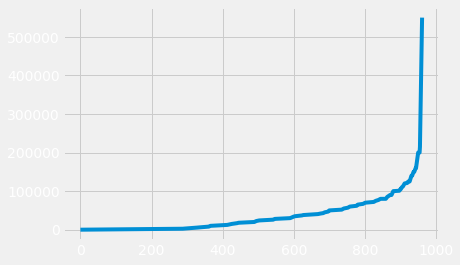

In [66]:
df_income_indexed = df_income.reset_index()
df_income_indexed = df_income_indexed.reset_index()
plt.plot(df_income_indexed['level_0'], df_income_indexed['income'])


In [0]:
pd.options.display.max_rows =1000
df_income_indexed.tail(500)

In [0]:
# I'm skeptical I've got respondents that actually make 550k per year, but at least it's plausible.
# I want to represent the correlation between 'money' and 'income'
# Best to look at that by binning income based on percentile
# and observing the median 'money' in each bin.
# Binning method is to create 4 new dataframes, one for each approximate quartile.
# Approximate, because the incomes at each quartile division are not unique.
# e.g., median income is $20,000, with many entries at that value. Quartile divisions
# need to be split between distinct values.
df_income_q1 = df_income_indexed.loc['0':'225']
df_income_q2 = df_income_indexed.loc['226':'489']
df_income_q3 = df_income_indexed.loc['490':'731']
df_income_q4 = df_income_indexed.loc['732':'961']

In [69]:
print(df_income_q1.money.median())
print(df_income_q2.money.median())
print(df_income_q3.money.median())
print(df_income_q4.money.median())
df_income_q1.head()

20000.0
20000.0
49999.5
224999.5


,level_0,index,money,income
0,0,573,9999.00,0.00
1,1,473,99999.00,0.00
2,2,209,2222222.00,0.00
3,3,471,1000.00,0.00
4,4,737,650.00,0.00


In [0]:
#df's for homeownership
df_homeowners = df_total_raw[df_total_raw['homeowner'] == 'Yes']
df_renters = df_total_raw[df_total_raw['homeowner'] == 'No']

In [0]:
# clean the color column, make color df's
df_total_raw.color = df_total_raw.color.str.lower()
pd.value_counts(df_total_raw['color'].values, sort=True)

In [122]:
# That is ugly.
# We'll start by using just the high counts. If I have time, I'll go through and
# clean the many low-instance colors.
# TODO: sort misc. colors

# blue, green, purple, red, orange, yellow, black, have enough entries for analysis

df_colors = df_total_raw[['money', 'color']]
print(df_colors.shape)
df_colors.head()


(1105, 2)


,money,color
0,17000.00,blue
1,300000.00,green
2,100000.00,blue
3,1000000.00,green
4,500000.00,red


In [0]:
df_blue = df_total_raw[df_total_raw['color']=='blue']
df_green = df_total_raw[df_total_raw['color']=='green']
df_purple = df_total_raw[df_total_raw['color']=='purple']
df_red = df_total_raw[df_total_raw['color']=='red']
df_orange = df_total_raw[df_total_raw['color']=='orange']
df_yellow = df_total_raw[df_total_raw['color']=='yellow']
df_black = df_total_raw[df_total_raw['color']=='black']
df_other = df_total_raw[~df_total_raw['color'].isin(['blue', 'green', 'purple', 'red', 'orange', 'yellow', 'black'])]
df_other.head()

In [0]:
# greed
df_greed = df_total_raw[['money', 'greed']]
df_greed = df_greed.dropna()
ax = sns.distplot(df_greed.greed, bins = int(10), color = 'r', kde_kws={'bw':.37})
# plt.hist(df_greed['greed'], color='red', edgecolor='black', bins=int(10))

In [168]:
# I want to split greed into a high, moderate, and low df.
df_greed_low = df_greed[df_greed['greed'].isin([0,1,2,3,4])]
print(df_greed_low.shape)
df_greed_med = df_greed[df_greed['greed'].isin([5,6])]
print(df_greed_med.shape)
df_greed_hi = df_greed[df_greed['greed'].isin([7,8,9,10])]
df_greed_hi.shape

(323, 2)
(451, 2)


(307, 2)

In [175]:
df_male = df_total_raw
pd.value_counts(df_total_raw['money'].values, sort=True)

10000.00           86
100000.00          61
1000000.00         57
1000.00            49
500000.00          39
50000.00           36
5000.00            35
500.00             33
100000000000.00    33
999999.00          24
10000000.00        22
20000.00           22
250000.00          18
100.00             17
5000000.00         14
1000000000.00      14
50.00              13
999.00             13
100000000.00       13
200000.00          12
15000.00           11
2000.00            11
200.00             11
300.00             10
25000.00           10
499999.00          10
250.00              9
2000000.00          7
900000.00           7
50000000.00         7
30000.00            7
9999.00             6
499.00              6
99999.00            6
450.00              5
7000.00             5
1500.00             5
450000.00           5
1.00                5
2500.00             5
3000000.00          5
20.00               5
999999999.00        4
750000.00           4
150.00              4
75.00     

In [169]:
# Make another DF to use in a histogram

medians = {'Categories': ['All', 'No income', 
                          'Income: $1 to $20k',
                          'Income: $21k to $50k', 
                          'Income: $50 or more',
                          'Homeowners',
                          'Non-homeowners',
                          'Blue',
                          'Green',
                          'Purple',
                          'Red',
                          'Orange',
                          'Yellow',
                          'Black',
                          'Other colors',
                          'Low greed',
                          'Moderate greed',
                          'High greed'],
          'Median': [df_total_raw.money.median(),
                     df_income_q1.money.median(),
                     df_income_q2.money.median(),
                     df_income_q3.money.median(),
                     df_income_q4.money.median(),
                     df_homeowners.money.median(),
                     df_renters.money.median(),
                     df_blue.money.median(),
                     df_green.money.median(),
                     df_purple.money.median(),
                     df_red.money.median(),
                     df_orange.money.median(),
                     df_yellow.money.median(),
                     df_black.money.median(),
                     df_other.money.median(),
                     df_greed_low.money.median(),
                     df_greed_med.money.median(),
                     df_greed_hi.money.median()]}
df_medians = pd.DataFrame(medians)
df_medians = df_medians.set_index(['Categories'])
df_medians.head(20)

,Median
Categories,
All,40000.00
No income,20000.00
Income: $1 to $20k,20000.00
Income: $21k to $50k,49999.50
Income: $50 or more,224999.50
Homeowners,134499.50
Non-homeowners,25000.00
Blue,32000.00
Green,50000.00


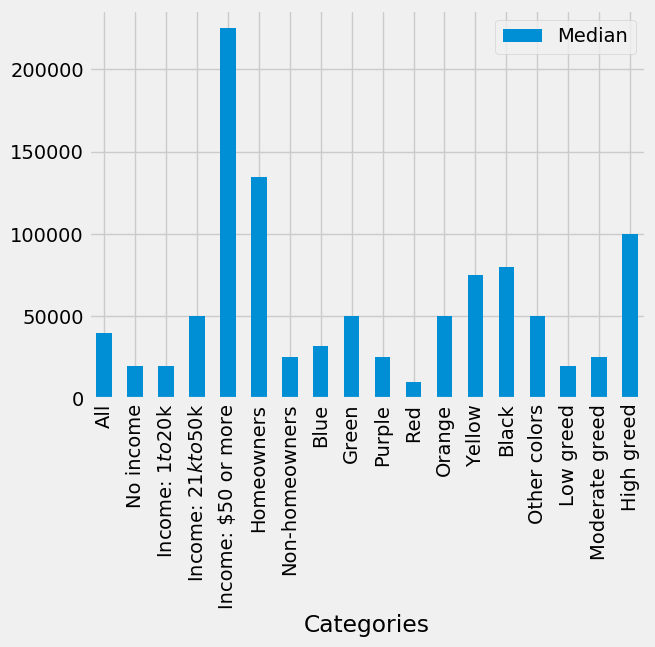

In [170]:
df_medians.plot.bar()
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
# Make a df with all values complete and good.
# This will have fewer entries, but they'll all have all questions answered.
df_pure = df_total_raw


In [0]:
np.set_printoptions(suppress=True)

In [0]:
pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.max_rows = 1000
df_pure = df_pure.dropna(axis = 'rows')
print(df_pure.shape)
df_pure.head(148)

In [75]:
# 181 rows had NaNs, and are removed in df_pure

df_total_indexed = df_total_raw.sort_values(by=['money'], axis='rows')
df_total_indexed = df_total_indexed.reset_index()
df_total_indexed = df_total_indexed.reset_index()
df_total_indexed.head()


,level_0,index,time,money,age,gender,income,greed,homeowner,color,source
0,0,786,6/19/2019 9:00:09,0.01,20.00,Male,"15,000.00",5.00,No,Green,reddit
1,1,651,6/19/2019 6:18:28,0.01,26.00,Female,0.00,5.00,No,Blue,reddit
2,2,1085,6/21/2019 3:05:34,0.20,17.00,Male,nan,6.00,No,Blue,reddit
3,3,855,6/19/2019 10:26:47,0.25,32.00,Male,"20,000.00",4.00,Yes,Blue,reddit
4,4,71,6/18/2019 21:14:54,1.00,29.00,Female,"25,000.00",8.00,No,Blue,reddit


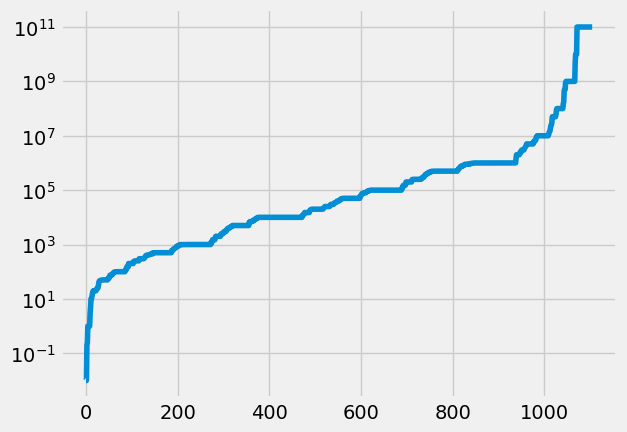

In [171]:
plt.plot(df_total_indexed['level_0'], df_total_indexed['money'])
plt.yscale('log')
plt.show()

In [172]:
df_players = df_total_raw.loc[(df_total_raw.money>9.99)&(df_total_raw.money<10000000)]
df_players = df_players.dropna()
df_players = df_players.sort_values(by=['money'], axis='rows')
df_players = df_players.reset_index()
df_players = df_players.reset_index()
df_players.income = df_players.income.astype('float64')
print(df_players.shape)
df_players.head()

(811, 11)


,level_0,index,time,money,age,gender,income,greed,homeowner,color,source
0,0,377,6/19/2019 0:16:58,10.00,15.00,Male,240.00,7.00,No,cyan,reddit
1,1,28,6/18/2019 19:59:18,15.00,26.00,Male,42000.00,6.00,No,red,Slack
2,2,426,6/19/2019 1:10:06,19.00,31.00,Male,50000.00,8.00,No,red,reddit
3,3,250,6/18/2019 22:42:13,19.00,33.00,Male,133000.00,7.00,No,chartreuse,reddit
4,4,945,6/19/2019 12:13:08,19.99,22.00,Male,85000.00,7.00,No,black,reddit


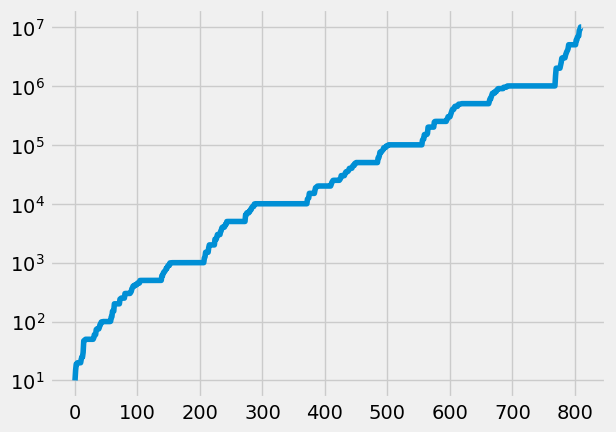

In [173]:
plt.plot(df_players['level_0'], df_players ['money'])
plt.yscale('log')
plt.show()